# 분류와 군집화

- 두 방법 모두 데이터를 특정한 군집으로 나눈다는 점에서는 공통점이 있다. 
- 용어도 비슷해서 데이터 과학을 하는 사람들도 가끔 헷갈리기도 한다. 
- 두 용어를 정의하면 분류란 소속 집단의 정보를 이미 알고 있는 상태에서, 새로운 데이터를 비슷한 집단으로 묶는 지도 학습의 한 종류이다. 
- 반면 군집화란 소속 집단의 정보가 없는 상태에서 비슷한 집단으로 묶는 비지도 학습의 한 종류이다.

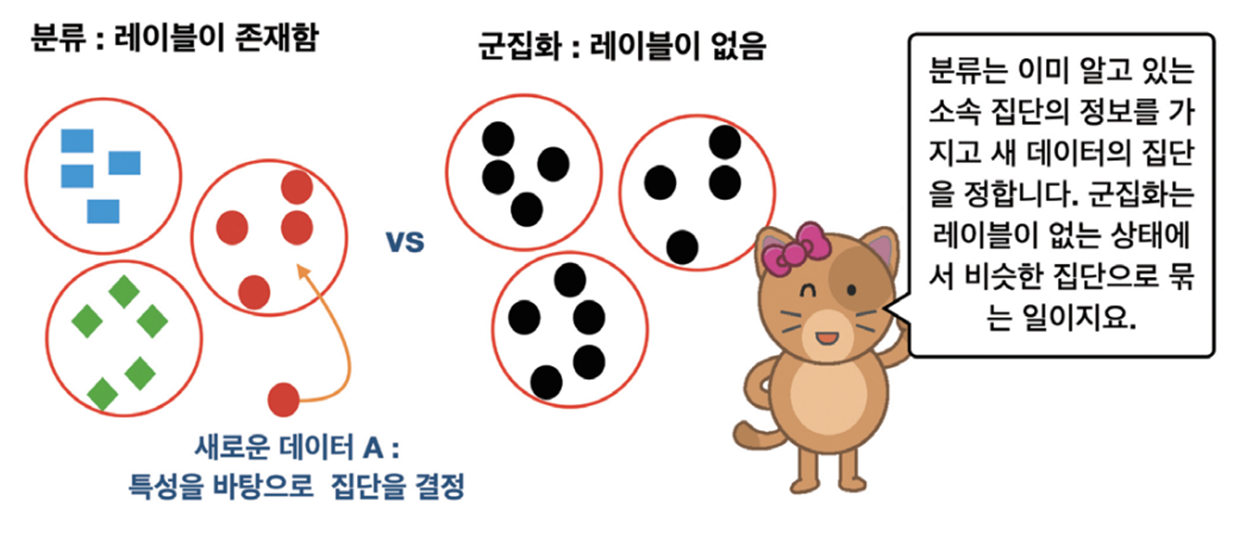

- 분류란 서로 다른 색상과 모양(레이블)으로 표시된 소속 집단이 있을 경우 이들의 특성을 이용하여 새로운 데이터 A가 입력될 경우 가장 유사한 특성을 가진 집단으로 A의 집단을 결정하는 것이다. 

- 군집화란 새로운 데이터의 분류에 집중하기 보다는 기존의 데이터를 가까운 특성 그룹으로 나누어서 특성 그룹의 성격을 파악하는 데 유용하다.

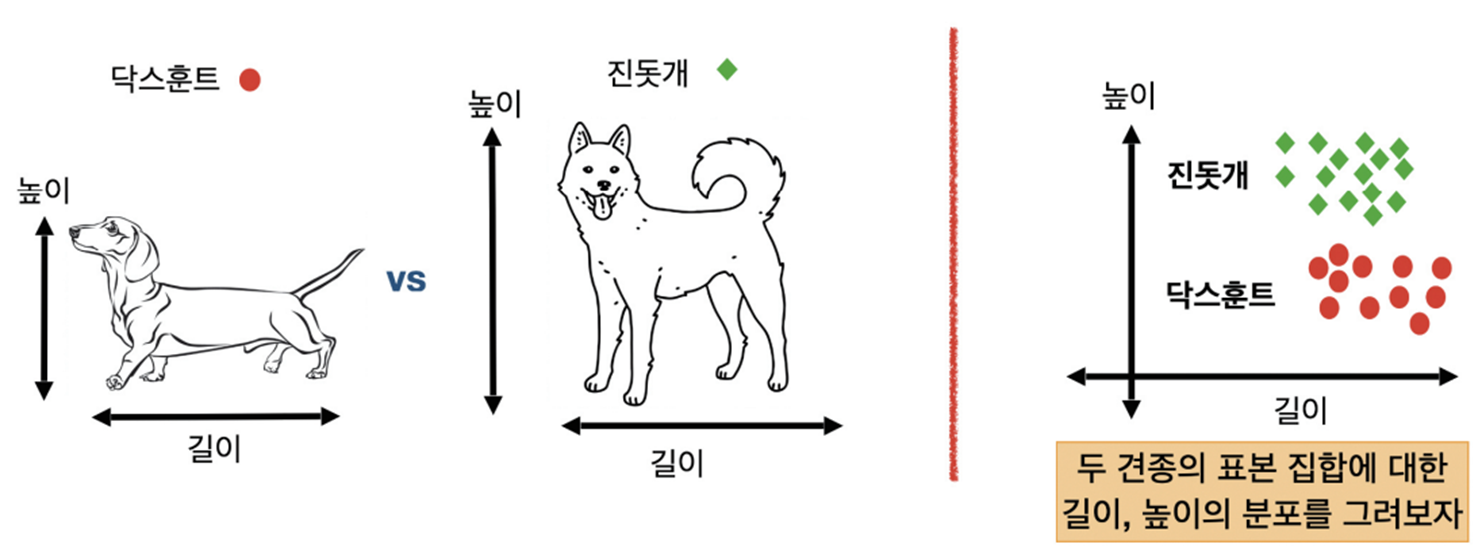

- 분류 알고리즘 중에서 가장 간단하면서도 직관적으로 이해하기 쉬운 k-NN 알고리즘을 살펴본다. 

- 몸통의 길이와 높이라는 특징(feature)을 각각 x x ,1 2 라고 두고 이 개들의 표본 집합에 대하여 x x ,1 2 를 측정하면 그림과 같은 산포도 그래프를 얻을 수 있을 것이다. 

- 산포도 그래프의 위쪽에 분포한 녹색 점은 진돗개이고, 아래쪽의 붉은 점들은 닥스훈트 종이다. 이러한 데이터를 이용하여 효과적으로 새로운 종에 대해 분류를 하려면 어떤 기법을 적용하는 것이 바람직할까?

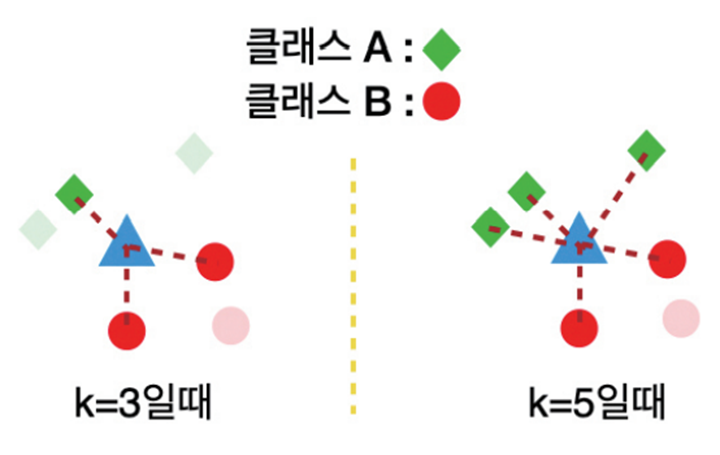

- **k-NN 알고리즘에서 k-NN은 k-최근접 이웃(k-Nearest Neighbor)** 의 약자로 특징 공간에 분포하는 데이터에 대하여 k개의 가장 가까운 이웃을 살펴보고 다수결 방식으로 데이터의 레이블을 할당하는 분류 방식이다. 
- 다음 그림은 2차원 평면으로 표시된 특징 공간에 분포하는 클래스 A와 클래스 B 데이터를 나타내고 있다. 
- 이때 왼쪽 그림과 같이 하늘색 삼각형으로 표시된 데이터가 추가될 경우 이 데이터는 클래스 A와 클래스 B중 어느 클래스로 분류하는 것이 좋을까? 

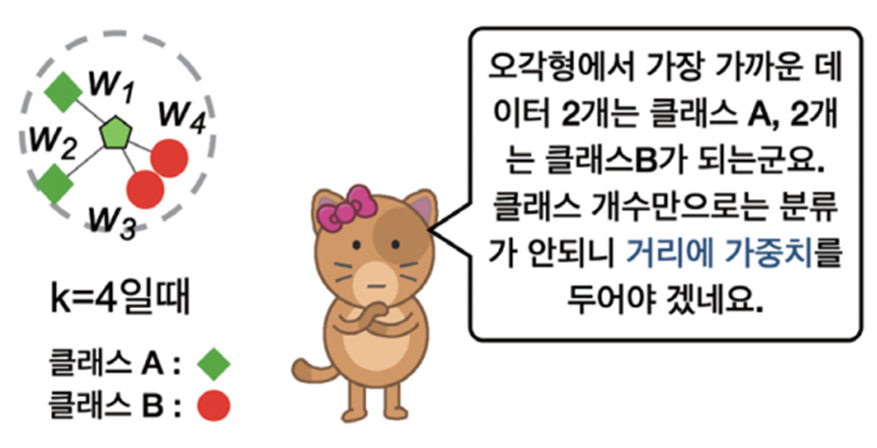

- k-NN 알고리즘은 k의 값에 따라 결과가 달라지는 특징이 있다.
- 만약 k=4 이면 2개의 녹색 점과 2개의 빨간색 원이 가장 가까운 그룹이므로 판정이 어려울 수 있다. 
- k가 짝수이고 가장 가까운 클래스 A와 클래스 B의 개수가 같은 경우에도 오각형 새 데이터의 클래스를 판정하는 방법도 있다. 

- 단순히 이웃의 수를 계산하는 것이 아니라 이웃과의 거리에 가중치(wi)를 부여하는 모델로 만들 수 있다. 
- 새 멤버와 가까운 위치에 있는 점들은 더 낮은 가중치를 얻고, 먼 도형들은 더 높은 가중치를 가지도록 한다. 
- 이 그림에서는 𝑤_1+𝑤_2>𝑤_3+𝑤_4이므로 가중치의 합이 낮은 값을 기준으로 클래스 B로 분류하는 방법이 있을 수 있다.
- k-NN 방법은 특징 공간에 있는 모든 데이터에 대한 정보가 필요하다. 따라서 데이터 인스턴스, 클래스, 특징의 요소들의 개수가 많다면, 많은 메모리 공간과 계산 시간이 필요하다는 단점이 있다. 
- 반면에 알고리즘이 매우 단순하고 직관적이며, 사전 학습이나 특별한 준비 시간이 필요없다는 점은 장점이다.

## 분류와 군집화

### k-NN 알고리즘에 사용할 견종의 표본 집합 시각화

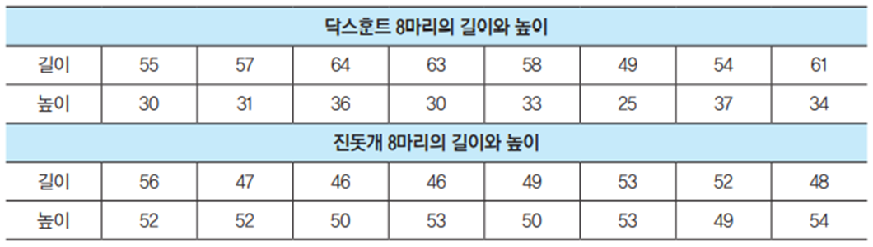

In [ ]:
import matplotlib.pyplot as plt

# 닥스훈트의 길이와 높이 데이터
dach_length = [55, 57, 64, 63, 58, 49, 54, 61]
dach_height = [30, 31, 36, 30, 33, 25, 37, 34]
# 진돗개의 길이와 높이 데이터
jin_length = [56, 47, 56, 46, 49, 53, 52, 48]
jin_height = [52, 52, 50, 53, 50, 53, 49, 54]

plt.scatter(dach_length, dach_height, c='r', label='Dachshund')
plt.scatter(jin_length, jin_height,c='b',marker='^', label='Jindo dog')

plt.xlabel('Length')             
plt.ylabel('Height')             
plt.title("Dog size")
plt.legend(loc='upper right')

### k-NN 분류기를 실행하자 

In [ ]:
import matplotlib.pyplot as plt

# 닥스훈트의 길이와 높이 데이터
dach_length = [55, 57, 64, 63, 58, 49, 54, 61]
dach_height = [30, 31, 36, 30, 33, 25, 37, 34]
# 진돗개의 길이와 높이 데이터
jin_length = [56, 47, 56, 46, 49, 53, 52, 48]
jin_height = [52, 52, 50, 53, 50, 53, 49, 54]

plt.scatter(dach_length, dach_height, c='r', label='Dachshund')
plt.scatter(jin_length, jin_height,c='b',marker='^', label='Jindo dog')

plt.xlabel('Length')             
plt.ylabel('Height')             
plt.title("Dog size")
plt.legend(loc='upper right')

newdata_length = [59]    # 새로운 데이터의 길이
newdata_height = [35]    # 새로운 데이터의 높이

# 새 데이터의 표식은 오각형(pentagon)으로 설정하고, 레이블은 new Data로
plt.scatter(newdata_length, newdata_height, s=100, marker='p',\
            c='g', label='new Data')

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics 

# 닥스훈트의 길이와 높이 데이터
dach_length = [55, 57, 64, 63, 58, 49, 54, 61]
dach_height = [30, 31, 36, 30, 33, 25, 37, 34]
# 진돗개의 길이와 높이 데이터
jin_length = [56, 47, 56, 46, 49, 53, 52, 48]
jin_height = [52, 52, 50, 53, 50, 53, 49, 54]

d_data = np.column_stack((dach_length, dach_height))
print(d_data)
d_label = np.zeros(len(d_data))   # 닥스훈트는 0으로 레이블링
print(d_label)
j_data = np.column_stack((jin_length, jin_height))
print(j_data)
j_label = np.ones(len(j_data))   # 진돗개는 1로 레이블링
print(j_label)

In [ ]:
newdata = [[59, 35]]

dogs = np.concatenate((d_data, j_data))
print("- 피쳐 -\n", dogs)
labels = np.concatenate((d_label, j_label))
print("- 라벨 -\n", labels)

dog_classes = {0:'닥스훈트', 1:'진돗개'} 

k = 3     # k를 3으로 두고 kNN 분류기를 만들어 보자
knn = KNeighborsClassifier(n_neighbors = k) 
knn.fit(dogs, labels)
y_pred = knn.predict(newdata)
print('데이터', newdata, ', 판정 결과:', dog_classes[y_pred[0]])

#### 참고 코드 : kNN에서 이웃한 데이터를 얻는 코드

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics 
import matplotlib.pyplot as plt

# 닥스훈트의 길이와 높이 데이터
dach_length = [55, 57, 64, 63, 58, 49, 54, 61]
dach_height = [30, 31, 36, 30, 33, 25, 37, 34]
# 진돗개의 길이와 높이 데이터
jin_length = [56, 47, 56, 46, 49, 53, 52, 48]
jin_height = [52, 52, 50, 53, 50, 53, 49, 54]

d_data = np.column_stack((dach_length, dach_height))
d_label = np.zeros(len(d_data))   # 닥스훈트는 0으로 레이블링
j_data = np.column_stack((jin_length, jin_height))
j_label = np.ones(len(j_data))   # 진돗개는 1로 레이블링

newdata = [[59, 35]]

dogs = np.concatenate((d_data, j_data))
labels = np.concatenate((d_label, j_label))

dog_classes = {0:'닥스훈트', 1:'진돗개'} 

k = 3     # k를 3으로 두고 kNN 분류기를 만들어 보자
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(dogs, labels)
y_pred = knn.predict(newdata)

distances, indexes = knn.kneighbors(newdata)
#plt.scatter(train_input[indexes], train_target[indexes], marker='D')
print('dist =', distances) 
print('indexes =', indexes) 
print('dogs[indexes]=', dogs[indexes])

def draw_neightbor(data, index, k):
    print('data =', data.shape)
    print('index =', index.shape)
    print('k =', k)
    for i in range(k):
        plt.scatter(data[index][0][i][0], dogs[index][0][i][1], marker='D', color='orange')

plt.scatter(59, 35, color = 'green', marker='^')
plt.scatter(dach_length, dach_height, c='red', label='Dachshund')
plt.scatter(jin_length, jin_height,c='blue',marker='^', label='Jindo dog')

draw_neightbor(dogs, indexes, k)
print('데이터', newdata, ', 판정 결과:', dog_classes[y_pred[0]])

In [ ]:
distances.shape

In [ ]:
indexes.shape

In [ ]:
plt.scatter(dach_length, dach_height, c='red', label='Dachshund')
plt.scatter(jin_length, jin_height,c='blue',marker='^', label='Jindo dog')

plt.xlabel('Length')             
plt.ylabel('Height')             
plt.title("Dog size")
plt.legend(loc='upper right')

newdata_length = [52]    # 새로운 데이터의 길이
newdata_height = [42]    # 새로운 데이터의 높이

newdata = [[52, 42]]

# ...코드 생략
# 새 데이터의 표식은 오각형(pentagon)으로 설정하고, 레이블은 new Data로
plt.scatter(newdata_length, newdata_height, s=100, marker='p', c='green', label='new Data')

In [ ]:
newdata = [[52, 42]]

k = 1     # k를 1으로 두고 kNN 분류기를 만들어 보자
knn = KNeighborsClassifier(n_neighbors = k) 
knn.fit(dogs, labels)
y_pred = knn.predict(newdata)
print('데이터', newdata, ', 판정 결과:', dog_classes[y_pred[0]])

In [ ]:
newdata = [[52, 42]]

k = 5     # k를 5으로 두고 kNN 분류기를 만들어 보자
knn = KNeighborsClassifier(n_neighbors = k) 
knn.fit(dogs, labels)
y_pred = knn.predict(newdata)
print('데이터', newdata, ', 판정 결과:', dog_classes[y_pred[0]])

distances, indexes = knn.kneighbors(newdata)
print('distances', distances, ', indexes:', indexes)
plt.scatter(newdata_length, newdata_height, s=100, marker='p', c='green', label='new Data')
plt.scatter(dach_length, dach_height, c='red', label='Dachshund')
plt.scatter(jin_length, jin_height,c='blue',marker='^', label='Jindo dog')
draw_neightbor(dogs, indexes, k)

In [ ]:
k = 9     # k를 3으로 두고 kNN 분류기를 만들어 보자
knn = KNeighborsClassifier(n_neighbors = k) 
knn.fit(dogs, labels)
y_pred = knn.predict(newdata)
print('데이터', newdata, ', 판정 결과:', dog_classes[y_pred[0]])

### 사이킷런의 학습용 데이터셋

- load_boston: 보스톤 집값 데이터
- load_iris: 붓꽃 데이터
- load_diabetes: 당뇨병 환자의 특성 데이터
- load_digits: 0~9 필기 숫자 데이터
- load_linnerud:  피트니스 클럽의 중년 남성 20명의 몸무게, 허리, 맥박데이터와 턱걸이, 윗몸 일으키기, 점프 횟수 데이터
- load_wine: 와인 성분 데이터
- load_breast_cancer: 위스콘신 유방암 환자 데이터

#### 데이터 셋을 로드하면 sklearn.utils.Bunch라는 자료구조(클래스)를 반환해 준다.

Bunch 클래스는 key-value 형식으로 구성되어 있으며, 딕셔너리(dict) 자료형과 유사한 구조를 가지고 있다.

key는 다음과 같다. 

- data: Feature 데이터, Numpy의 배열(ndarray) 혹은 Pandas의 dataframe 형태
- target: Label 데이터, Numpy의 배열(ndarray) 혹은 Pandas의 Series 형태
- feature_names: Feature 데이터의 이름, 리스트 - **특징데이터**
- target_names: Label 데이터의 이름, 리스트 - **정답(라벨)데이터**
- DESCR: 데이터 셋의 설명, 문자열
- filename: 데이터 셋의 파일 저장 위치 (csv), 문자열

### k-NN 활용 예제 - 붓꽃 데이터 준비하기

- 붓꽃(iris)은 관상용으로도 재배되는 아름다운 꽃이며 크기와 색상이 다른 많은 종이 있다. 
- 이 예제에서는 사이킷런 라이브러리에서 제공하는 붓꽃 데이터 세트를 사용해 볼 예정이다. 
- 세 붓꽃 종의 이름은 Versicolor, Setosa, Virginica이며 각 종에 따라 꽃받침의 길이와 너비, 꽃잎의 길이와 너비가 약간씩 차이가 난다. 


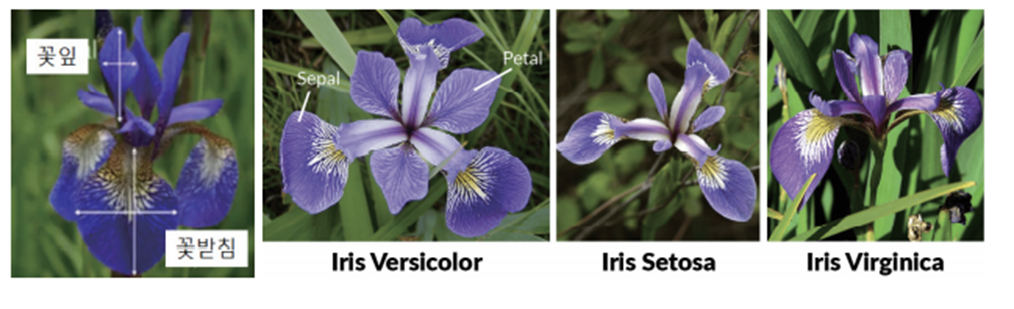

In [ ]:
from sklearn.datasets import load_iris 

iris = load_iris() 
iris.data[:3]     # 최초 3개 데이터의 값을 출력

In [ ]:
print('iris 데이터의 형태:', iris.data.shape)

In [ ]:
print('iris 데이터의 속성들:', iris.feature_names)

In [ ]:
print('iris 데이터의 레이블:', iris.target)

In [ ]:
import pandas as pd

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = pd.Series(iris.target)
iris_df.head()

### k-NN 활용 예제 - 붓꽃 데이터로 학습하기

In [ ]:
iris_df.describe()

In [ ]:
iris_df['target'].value_counts()

In [ ]:
iris_df.values[:10]

In [ ]:
X = iris_df.iloc[:, :4]
y = iris_df.iloc[:, -1]

In [ ]:
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics 

def iris_knn(X, y, k):
    X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3)
    knn = KNeighborsClassifier(n_neighbors = k) 
    knn.fit(X_train, y_train) 
    y_pred = knn.predict(X_test) 
    return metrics.accuracy_score(y_test, y_pred) 

k = 3
scores = iris_knn(X, y, k)
print('n_neighbors가 {0:d}일때 정확도: {1:.3f}'.format(k, scores))

### 새로운 데이터에 대하여 모델을 적용하고 분류



In [ ]:
from sklearn.datasets import load_iris 
from sklearn.neighbors import KNeighborsClassifier 
 
k = 3
iris = load_iris() 
knn = KNeighborsClassifier(n_neighbors = k) 
knn.fit(iris.data, iris.target) 

In [ ]:
classes = {0:'setosa', 1:'versicolor', 2:'virginica'} 
 
# 새로운 데이터를 제시해 보자. 
X = [[4, 2, 1.3, 0.4], 
     [4, 3, 3.2, 2.2]] 
y = knn.predict(X) 
 
print('{} 특성을 가지는 품종: {}'.format(X[0], classes[y[0]])) 
print('{} 특성을 가지는 품종: {}'.format(X[1], classes[y[1]]))

In [ ]:
y_pred_all = knn.predict(iris.data)
scores = metrics.accuracy_score(iris.target, y_pred_all)
print('n_neighbors가 {0:d}일때 정확도: {1:.3f}'.format(k, scores))

In [ ]:
import matplotlib.pyplot as plt
plt.hist2d(iris.target, y_pred_all, bins=(3,3), cmap=plt.cm.jet)
plt.colorbar()

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

label=['setosa', 'versicolor', 'virginica'] #라벨 설정
plot = ConfusionMatrixDisplay.from_predictions(iris.target,y_pred_all,
                             display_labels=label, # 표에 표시할 labels
                             cmap=plt.cm.Oranges, # 컬러맵(plt.cm.Reds, plt.cm.rainbow 등이 있음)
                             normalize=None) # 'true', 'pred', 'all' 중에서 지정 가능. default=None
plot.ax_.set_title('Confusion Matrix')

사이킷런 모듈에서는 이러한 시각화 결과를 혼동 행렬confusion matrix이라는 이름으로 아래와 같이 구할 수 있음

In [ ]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(iris.target, y_pred_all)
conf_mat

## 분류분석 성능평가

사이킷런 패키지는 metrics 서브패키지에서 다음처럼 다양한 분류용 성능평가 명령을 제공한다.

- confusion_matrix(y_true, y_pred)
- accuracy_score(y_true, y_pred)
- precision_score(y_true, y_pred)
- recall_score(y_true, y_pred)
- f1_score(y_true, y_pred)
- classfication_report(y_true, y_pred)
- roc_curve
- auc

**머신러닝의 분류 문제에서는 정확도, 정밀도, 재현율, 오차행렬, F1 스코어, ROC AUC의 여러 성능 평가 지표를 이용해 예측 성능을 평가할 수 있다. 이 때 주의할 점은 이진 분류인지의 여부를 잘 확인해 각각의 평가 지표를 적절하게 적용해야 한다.**

**불균형한 레이블 클래스를 가지는 이진 분류 모델에서는 정확도만 가지고 판단할 경우 모델의 신뢰도가 떨어질 수 있는 것이다. 이런 경우, 정밀도와 재현율을 사용하는 것이 더욱 바람직하다.**

**정밀도와 재현율 중 어느 것이 더 중요한지는 경우에 따라 다르다. 암 판단 모델과 같이 실제 Positive(양성)인 데이터를 Negative(음성)로 잘못 판단하는 것이 큰 문제인 경우 재현율이 상대적으로 더 중요해지며, 스팸메일 분류모델과 같이 실제 Negative(일반메일)인 데이터를 Positive(스팸메일)로 잘못 판단하는 것이 큰 문제인 경우 정밀도가 상대적으로 더 중요해지는 것이다. 가장 좋은 것은 두 수치 모두 높은 경우일 것이며, 한 수치가 상대적으로 낮더라도 그 차이가 심해서는 안된다.**

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

- 오차행렬
print(confusion_matrix(실제 레이블 값, 예측값))
- 정확도
print(accuracy_score(실제 레이블 값, 예측값))
- 정밀도
print(precision_score(실제 레이블 값, 예측값))
- 재현율
print(recall_score(실제 레이블 값, 예측값))

100명의 환자와 100 명의 건강한 사람에 대하여 이 검사 키트의 성능을 테스트한다고 가정
검사 키트가 COVID-19 환자(양성positive:P)에 대해서 5명을 음성
COVID-19에 감염되지 않은 건강한 사람(음성negative:N)에 대해서 89명을 음성으로, 11명을 양성으로 판정

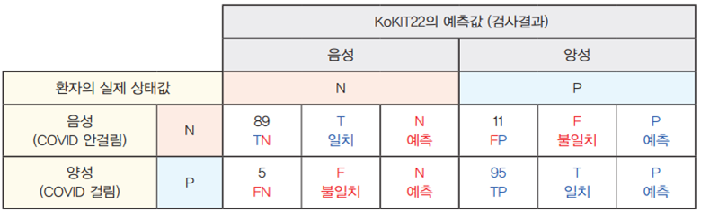

정확도 Acc는 다음 식을 이용해서 구할 수 있음
전체 데이터(FP+FN+TP+TN)중에서 제대로 판정한 데이터(TP + TN)의 비율이 바로 이 값

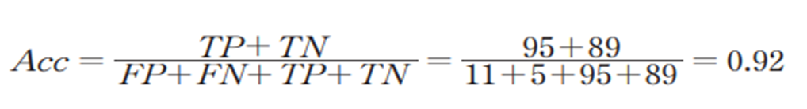

진짜 양성 비율True Positive Rate:TPR은 재현율recall이라고도 함 
양성환자 중에서 이 키트가 올바르게 양성이라고 분류한 환자의 비율로 다음과 같은 식 (TPR 혹은 Rec로 표기함)

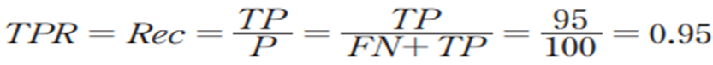

정밀도precision은 검사 키트가 확진자로 분류한 사람들 중 실제 양성인 경우로 다음과 같은 식(Pre로 표기함)

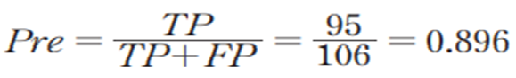

재현율 : 실제로 COVID-19에 양성인 대상자를 양성으로 분류할 확률
정밀도 : 양성으로 예측한 사람들 중에서 실제 COVID-19 양성자일 확률

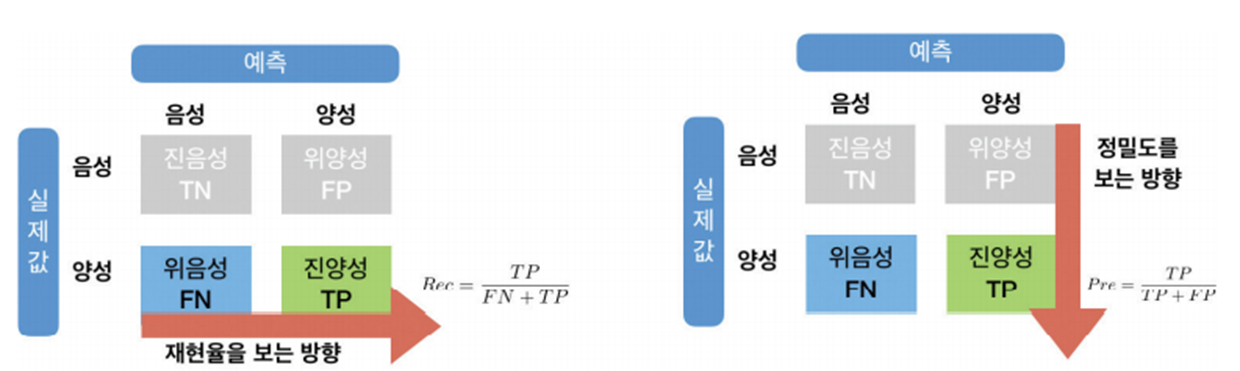

---

## 분류 문제의 평가 방법 - 샘플 코드

In [ ]:
from sklearn.datasets import load_breast_cancer

# 유방암 진단 데이터세트 불러오기
data = load_breast_cancer()

# 특징 데이터 생성
X = data.data

# 종속 변수 생성. 악성 발견이 목적이므로 레이블의 0과 1을 바꿈
y = 1 - data.target

# 특징으로 사용할 데이터를 평균으로 구분하는 10개 열로 줄임
X = X[:, :10]

from sklearn.linear_model import LogisticRegression

# 로지스틱 회귀 모델 생성
model_lor = LogisticRegression(max_iter=500)

model_lor.fit(X, y)           # 학습
y_pred = model_lor.predict(X) # 예측

#### 혼동 행렬 - 샘플 코드

In [ ]:
from sklearn.metrics import confusion_matrix

# 종속 변수와 예측 결과로 혼동 행렬 생성
cm = confusion_matrix(y, y_pred)

print(cm)

#### 정확도 - 샘플 코드

In [ ]:
from sklearn.metrics import accuracy_score

# 종속 변수와 예측 결과로 정확도 계산
print(accuracy_score(y, y_pred))

#### 정밀도 - 샘플 코드

In [ ]:
from sklearn.metrics import precision_score

# 종속 변수와 예측 결과로 정밀도 계산
print(precision_score(y, y_pred))

#### 재현율 - 샘플 코드

In [ ]:
from sklearn.metrics import recall_score

# 종속 변수와 예측 결과로 재현율 계산
print(recall_score(y, y_pred))

#### F값 - 샘플 코드

In [ ]:
from sklearn.metrics import f1_score

# 종속 변수와 예측 결과로 F값 계산
print(f1_score(y, y_pred))

#### ROC 곡선과 곡선아래면적 - 샘플 코드 1

In [ ]:
from sklearn.metrics import roc_curve

# 유방암 진단 데이터세트 특징 데이터의 예측 확률 계산
probas = model_lor.predict_proba(X)

# 종속 변수와 예측 확률의 두 번째 요소로 ROC 곡선을 생성하고 위양성률, 진양성률, 기준값 저장
fpr, tpr, thresholds = roc_curve(y, probas[:, 1])

#### ROC 곡선과 곡선아래면적 - 샘플 코드 2

In [ ]:
import matplotlib.pyplot as plt

# ROC 곡선의 그래프 영역 스타일 지정
plt.style.use('fivethirtyeight')

# 캔버스와 좌표 평면 생성
fig, ax = plt.subplots()

# 그래프 영역의 크기 설정
fig.set_size_inches(4.8, 5)

# 그래프의 선을 이루는 값과 선 색상 설정
ax.step(fpr, tpr, 'gray')

# 그래프의 선을 기준으로 곡선아래면적을 skyblue로 채우도록 설정
ax.fill_between(fpr, tpr, 0, color='skyblue', alpha=0.8)

# x축 레이블 설정
ax.set_xlabel('False Positive Rate')

# y축 레이블 설정
ax.set_ylabel('True Positive Rate')

# 그래프 영역 배경색 설정
ax.set_facecolor('xkcd:white')

# 최종 그래프 생성
plt.show()

---

# 군집분석(비지도 학습, 자율학습)

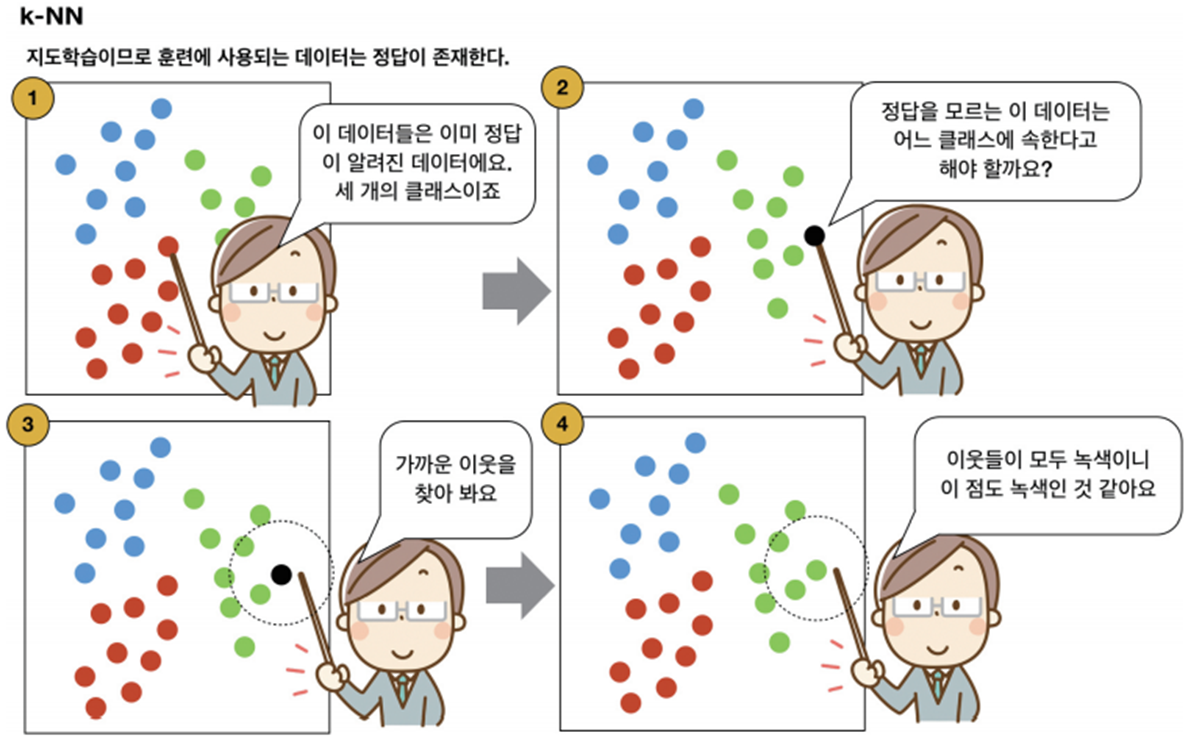

- k-NN 은 가장 가까운 이웃 k개를 찾음

- 이웃들이 어떤 클래스에 속하는지를 보고, 새로운 데이터의 클래스를 4번 그림과 같이 결정하면 됨
---

- k-평균 알고리즘은 k-NN과 달리 정답 레이블이 없는 문제

- 데이터를 몇 개의 묶음, 혹은 클러스터로 나눌 것인지를 결정 해야 하며 이것이 바로 k-평균 알고리즘의 k가 됨

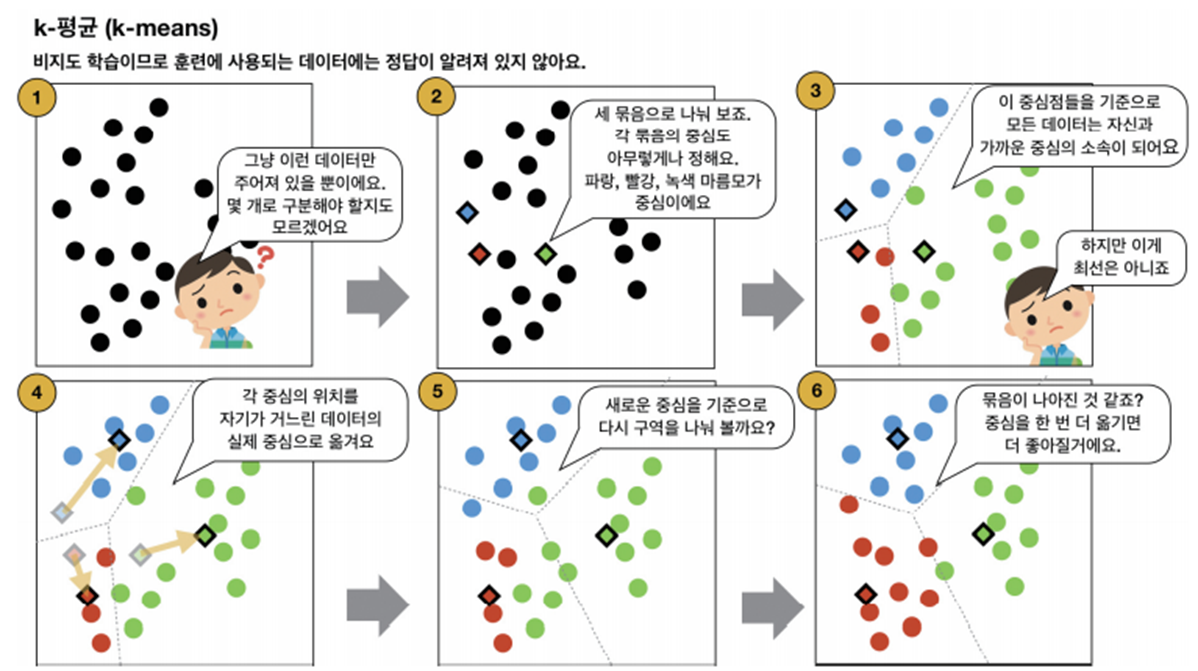

### 게임을 하는 고객을 분류해 보자

게임 사용자의 성향을 다음과 같이 네 종류로 나누어 보자.

1. 게임을 오래하고 게임 레벨도 높은 고객
2. 게임을 오래하고도 게임 레벨이 낮은 고객
3. 게임을 짧게하지만 게임 레벨이 높은 고객
4. 게임을 짧게하고 게임 레벨도 낮은 고객

100 명의 사용자에 대해서 위와 같이 월간 게임 사용 시간과 게임 레벨을 분석하여 네 종류의 그룹으로 분석을 하고자 한다. 

이를 위해서 다음과 같은 표를 만들어 본다. 

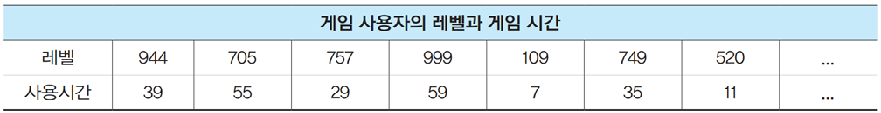

- 위의 표 데이터의 경우 애초부터 4가지 종류의 고객에 대한 레이블링이 없다. 
- 이 두 가지의 속성을 바탕으로 고객을 군집화하여야 하는데 이를 위해서 필요한 방법이 바로 **k-평균 알고리즘**이다.
- k-평균 알고리즘은 원리가 단순하고 직관적이며 성능이 좋은 군집화 알고리즘이다. 
- 사전에 군집의 개수 k 값을 지정해야 하는 단점이 있다. 

우선 아래의 그림 (a)와 같이 2차원 공간상에 분포하는 6개의 점들이 있고 k 값이 2인 경우를 가정하여, k-평균 알고리즘이 수행되는 과정을 살펴보도록 하자. 

- k가 2인 경우 (b)에 표시된 것과 같이 6개의 점들 중에서 빨간색 동그라미로 표시된 임의의 두 점을 선택하는 것으로 알고리즘이 시작된다. 
- 이 두 점과 가장 가까운 점을 그룹으로 묶을 경우 그림 (c)와 같이 A 그룹, B 그룹으로 묶이는 것을 알 수 있다. 
- A 그룹에는 2개의 점이 있으며, B 그룹에는 4개의 점이 있는데 이 점들의 중심점을 구하면 그림 (d)와 같이 표시할 수 있다.
- 그림 (e)와 같이 ✚로 표시된 A 그룹의 중심점과 ✚로 표시된 B 그룹의 중심점을 이용하여 모든 점과의 거리를 구한 후 다시 그룹을 만들어 A'과 B' 그룹을 만들도록 한다( 그림 (f)). 
- 이 과정을 (b) 단계에서부터 다시 반복하여 이전의 군집 배정과 결과가 같거나, 갱신이 거의 발생하지 않을 경우 알고리즘을 종료한다. 
- 다음 예시에서는 (f) 단계에서 종료될 것이다.

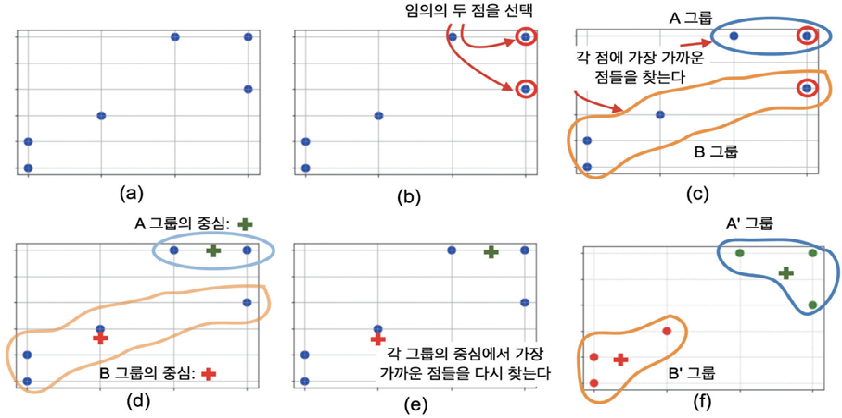

### 데이터 전처리의 필요성을 예제를 통해 확인하기

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

game_usage = pd.read_csv('data/game_usage.csv')
game_usage.head(3)

In [ ]:
X = game_usage['time spent']
Y = game_usage['game level']

# 으뜸 게임사의 게임 이용자 분석: 산포도 그래프
plt.title("Game player data")
plt.xlabel('Time spent')
plt.xlabel('Game level') 
plt.scatter(X, Y)

In [ ]:
from sklearn import cluster

def kmeans_predict_plot(data, k):
    model = cluster.KMeans(n_clusters=k)
    model.fit(data)
    labels = model.predict(data)
    colors = np.array(['red', 'green', 'blue', 'magenta']) 
    plt.suptitle('k-Means clustering, k={}'.format(k)) 
    plt.scatter(data[:, 0], data[:, 1], color=colors[labels])

gamer_data = np.column_stack((X, Y))
kmeans_predict_plot(gamer_data, k = 4)

In [ ]:
kmeans_predict_plot(gamer_data, k = 4)
plt.xlim(0, 1000); plt.ylim(0, 1000)

### 데이터 정규화 방법을 이용하자

In [ ]:
# 최대, 최소값 스케일러
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(gamer_data)
n_data = scaler.transform(gamer_data)
n_data[:, 0].mean(), n_data[:, 1].mean()

In [ ]:
n_data[:, 0].min(), n_data[:, 0].max()

In [ ]:
n_data[:, 1].min(), n_data[:, 1].max()

In [ ]:
kmeans_predict_plot(n_data, k = 4) # 4개의 군집 생성

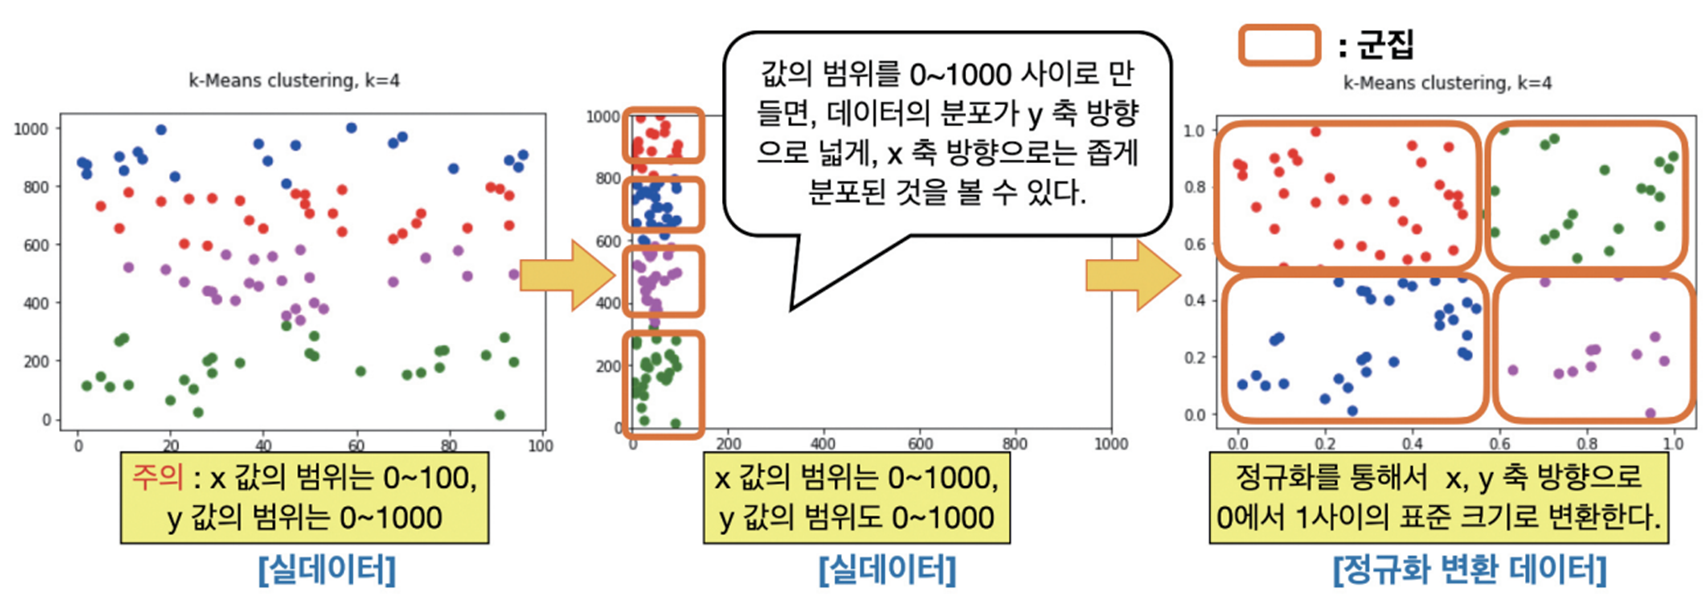

### 다양한 스케일러 살펴보기

데이터를 정제하는 또 다른 방법은 **표준화(standardization)**이다. 표준화는 데이터를 정제할 때 전체의 평균(mean)과 분산(variance)을 사용한다. 
m개의 인스턴스를 가진 데이터 xi 의 평균 𝜇_𝑥와 분산 𝜎_𝑥^2 는 다음과 같이 정의된다.

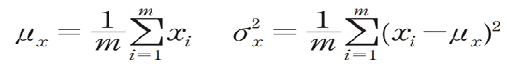

표준편차(standard deviation)는 분산의 제곱근으로, 𝜎_𝑥 로 나타낸다. 표준화는 이들 값을 구한 뒤에 x를 다음과 같이 x’로 바꾸는 일이다. 이 변환이 이루어지면 x’는 평균이 0이고 분산이 1인 데이터가 된다.  

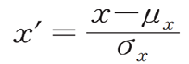

In [ ]:
import numpy as np

a = np.array([10, 8, 10, 8, 8, 4])
print('합계 :', a.sum())
print('평균 :', a.mean())
print('분산 :', a.var())
print('표준편차 :', a.std())

In [ ]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
standardScaler.fit(gamer_data)
gamer_data_scaled = standardScaler.transform(gamer_data)

gamer_data_scaled[:, 0].std(), gamer_data_scaled[:, 1].std()

In [ ]:
gamer_data_scaled[:, 0].mean(), gamer_data_scaled[:, 1].mean()

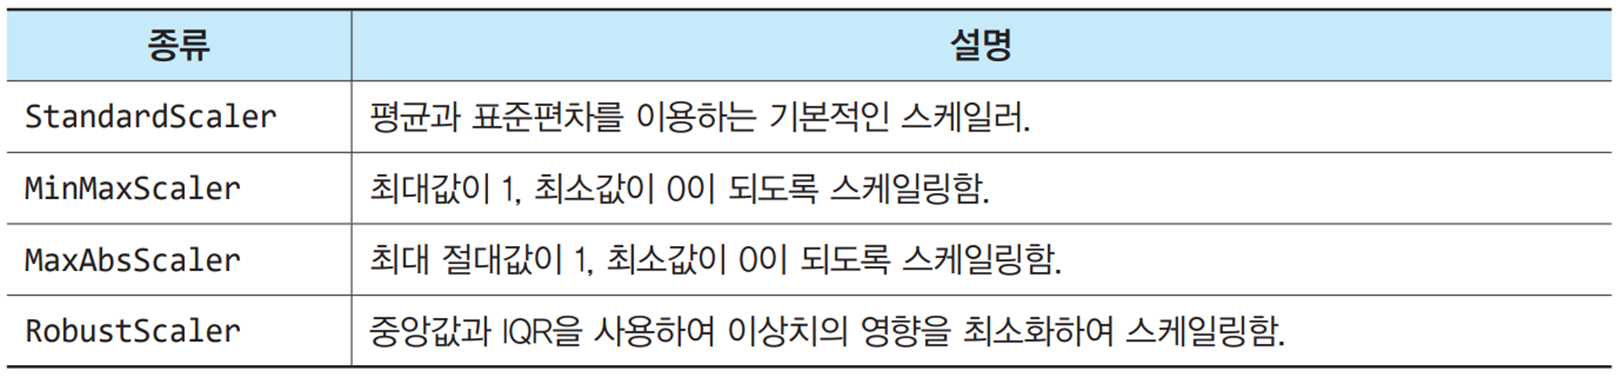

---

## 로지스틱 회귀 분석

### 로지스틱 회귀 분석을 이용한 유방암 진단 프로젝트 

### 1) 데이터 수집

In [ ]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_breast_cancer

In [ ]:
b_cancer = load_breast_cancer()

### 2) 데이터 수집 및 탐색

In [ ]:
print(b_cancer.DESCR)

In [ ]:
b_cancer_df = pd.DataFrame(b_cancer.data, columns = b_cancer.feature_names)

In [ ]:
b_cancer_df['diagnosis']= b_cancer.target

In [ ]:
b_cancer_df.head()

In [ ]:
print('유방암 진단 데이터셋 크기 : ', b_cancer_df.shape)

In [ ]:
b_cancer_df.info()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
b_cancer_scaled = scaler.fit_transform(b_cancer.data)

In [ ]:
print(b_cancer.data[0])

In [ ]:
print(b_cancer_scaled[0])

### 3) 분석 모델 구축 : 로지스틱 회귀를 이용한 이진 분류 모델

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
# X, Y 설정하기
Y = b_cancer_df['diagnosis']
X = b_cancer_scaled 

In [ ]:
# 훈련용 데이터와 평가용 데이터 분할하기
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [ ]:
# 로지스틱 회귀 분석 : (1)모델 생성
lr_b_cancer = LogisticRegression() # multi_class : {'auto', 'ovr', 'multinomial'}, default='auto'

In [ ]:
# 로지스틱 회귀 분석 : (2)모델 훈련
lr_b_cancer.fit(X_train, Y_train)

In [ ]:
# 로지스틱 회귀 분석 : (3)평가 데이터에 대한 예측 수행 -> 예측 결과 Y_predict 구하기
Y_predict = lr_b_cancer.predict(X_test)

### 4) 결과 분석 

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
# 오차 행렬 
confusion_matrix(Y_test, Y_predict)

In [ ]:
acccuracy = accuracy_score(Y_test, Y_predict)
precision = precision_score(Y_test, Y_predict)
recall = recall_score(Y_test, Y_predict)
f1 = f1_score(Y_test, Y_predict)
roc_auc = roc_auc_score(Y_test, Y_predict)

In [ ]:
print('정확도: {0:.3f}, 정밀도: {1:.3f}, 재현율: {2:.3f},  F1: {3:.3f}'.format(acccuracy,precision,recall,f1))

# PCA : 주성분분석

### 고차원의 데이터를 저차원의 데이터로 환원시키는 기법
### 데이터를 어떤 기준을 바탕으로 변환을 하고, 그 변환으로 인해 '주성분'이 추출된다.
### 추출된 주성분은 원래 가지고 있는 데이터와 다르며 변환된 데이터이다.
### 변수의 의미가 중요한 경우에는 PCA를 사용하면 안 된다. PCA는 데이터에 변환을 가하는 것이기 때문이다.
### PCA의 본질은 차원 축소이며 차원이 축소됐다는 것은 원본 데이터가 아니라 변환(projection)된 데이터, 즉 주성분을 이용해 분석 혹은 모델링을 진행하겠다는 것이다.

In [ ]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

from sklearn.preprocessing import StandardScaler  # 표준화 패키지 라이브러리 
x = df.drop(['target'], axis=1).values # 독립변인들의 value값만 추출
y = df['target'].values # 종속변인 추출

x = StandardScaler().fit_transform(x) # x객체에 x를 표준화한 데이터를 저장

features = ['sepal length', 'sepal width', 'petal length', 'petal width']
pd.DataFrame(x, columns=features).head()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x)
PC_score = pca.transform(x)
# pca의 eigen_vector
pca.components_

In [ ]:
pca.explained_variance_ #explained_variacne를 통해서 PC값의 설명력을 확인 할 수 있다.

In [ ]:
ratio = pca.explained_variance_ratio_ #explained_variance 비율로 확인
ratio

In [ ]:
df_v = pd.DataFrame(ratio, index=['PC1','PC2','PC3','PC4'], columns=['pc_ratio'])
df_v.plot.pie(y='pc_ratio')
df_v

In [ ]:
import matplotlib.pyplot as plt
ax = plt.plot( ['PC1','PC2','PC3','PC4'], ratio)
plt.ylabel('Variance(%)')
plt.xlabel('Principal Component')
plt.title('PCA Plot')
plt.show()

In [ ]:
ax = plt.bar(x = range(len(ratio)), height=ratio, tick_label=['PC1','PC2','PC3','PC4'])
plt.ylabel('Variance(%)')
plt.xlabel('Principal Component')
plt.title('PCA Plot(bar)')
plt.show()

In [ ]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA(n_components=2) # 주성분의 개수 결정
pc = pca.fit_transform(x)
pc_y = np.c_[pc,y]
principalDf = pd.DataFrame(pc_y, columns = ['pc1', 'pc2','diagnosis'])
principalDf

In [ ]:
import seaborn as sns
sns.scatterplot(data=principalDf,x='pc1',y='pc2',hue='diagnosis')

In [ ]:
# 로지스틱 분석
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

clf2 = LogisticRegression(max_iter=1000, random_state=0, 
                        multi_class='multinomial')
clf2.fit(pc,y)
pred = clf2.predict(pc) #PC_score[:,:2]
confusion_matrix(y,pred)

# 로지스틱 회귀분석을 이용한 감정분석

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/tripadviser_review.csv")

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.isnull().sum()

In [ ]:
df.info()

In [ ]:
df['text'][0]

In [ ]:
df['text'][100]

In [ ]:
import re

def apply_regular_expression(text):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')  # 한글 추출 규칙: 띄어 쓰기(1 개)를 포함한 한글
    result = hangul.sub('', text)  # 위에 설정한 "hangul"규칙을 "text"에 적용(.sub)시킴
    return result

In [ ]:
df['text'][0]

In [ ]:
apply_regular_expression(df['text'][0])

In [ ]:
from konlpy.tag import Okt
from collections import Counter

In [ ]:
okt = Okt()  # 명사 형태소 추출 함수
nouns = okt.nouns(apply_regular_expression(df['text'][0]))
nouns

In [ ]:
corpus = "".join(df['text'].tolist())
corpus

In [ ]:
apply_regular_expression(corpus)

In [ ]:
nouns = okt.nouns(apply_regular_expression(corpus))
print(nouns)

In [ ]:
counter = Counter(nouns)

In [ ]:
counter.most_common(10)

In [ ]:
available_counter = Counter({x: counter[x] for x in counter if len(x) > 1})
available_counter.most_common(10)

In [ ]:
stopwords = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/korean_stopwords.txt").values.tolist()
stopwords[:10]

In [ ]:
jeju_hotel_stopwords = ['제주', '제주도', '호텔', '리뷰', '숙소', '여행', '트립']
for word in jeju_hotel_stopwords:
    stopwords.append(word)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ 가-힣]')  # 정규 표현식 처리
    result = hangul.sub('', text)
    okt = Okt()  # 형태소 추출
    nouns = okt.nouns(result)
    nouns = [x for x in nouns if len(x) > 1]  # 한글자 키워드 제거
    nouns = [x for x in nouns if x not in stopwords]  # 불용어 제거
    return nouns

In [ ]:
vect = CountVectorizer(tokenizer = lambda x: text_cleaning(x))
bow_vect = vect.fit_transform(df['text'].tolist())
word_list = vect.get_feature_names()
count_list = bow_vect.toarray().sum(axis=0)

In [ ]:
word_list

In [ ]:
count_list

In [ ]:
bow_vect.toarray()

In [ ]:
bow_vect.shape

In [ ]:
word_count_dict = dict(zip(word_list, count_list))
word_count_dict

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_vectorizer = TfidfTransformer()
tf_idf_vect = tfidf_vectorizer.fit_transform(bow_vect)

In [ ]:
print(tf_idf_vect.shape)

In [ ]:
print(tf_idf_vect[0])

In [ ]:
print(tf_idf_vect[0].toarray().shape)
print(tf_idf_vect[0].toarray())

In [ ]:
vect.vocabulary_

In [ ]:
invert_index_vectorizer = {v: k for k, v in vect.vocabulary_.items()}
print(str(invert_index_vectorizer)[:100]+'...')

In [ ]:
df.sample(10)

In [ ]:
df['rating'].hist()

In [ ]:
def rating_to_label(rating):
    if rating > 3:
        return 1
    else:
        return 0
    
df['y'] = df['rating'].apply(lambda x: rating_to_label(x))

In [ ]:
df["y"].value_counts()

In [ ]:
from sklearn.model_selection import train_test_split

x = tf_idf_vect
y = df['y']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=1)


In [ ]:
x_train.shape, y_train.shape

In [ ]:
x_test.shape, y_test.shape

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# fit in training set
lr = LogisticRegression(random_state = 0)
lr.fit(x_train, y_train)

# predict in test set
y_pred = lr.predict(x_test)

In [ ]:
print('accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('precision: %.2f' % precision_score(y_test, y_pred))
print('recall: %.2f' % recall_score(y_test, y_pred))
print('F1: %.2f' % f1_score(y_test, y_pred))

In [ ]:
from sklearn.metrics import confusion_matrix

confu = confusion_matrix(y_true = y_test, y_pred = y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(confu, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
df['y'].value_counts()

In [ ]:
positive_random_idx = df[df['y']==1].sample(275, random_state=12).index.tolist()
negative_random_idx = df[df['y']==0].sample(275, random_state=12).index.tolist()

In [ ]:
random_idx = positive_random_idx + negative_random_idx
x = tf_idf_vect[random_idx]
y = df['y'][random_idx]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)


In [ ]:
x_train.shape, y_train.shape

In [ ]:
x_test.shape, y_test.shape

In [ ]:
lr2 = LogisticRegression(random_state = 0)
lr2.fit(x_train, y_train)
y_pred = lr2.predict(x_test)

In [ ]:
print('accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('precision: %.2f' % precision_score(y_test, y_pred))
print('recall: %.2f' % recall_score(y_test, y_pred))
print('F1: %.2f' % f1_score(y_test, y_pred))

In [ ]:

from sklearn.metrics import confusion_matrix

confu = confusion_matrix(y_true = y_test, y_pred = y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(confu, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
lr2.coef_

In [ ]:
plt.figure(figsize=(10, 8))
plt.bar(range(len(lr2.coef_[0])), lr2.coef_[0])


In [ ]:
print(sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = True)[:5])
print(sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = True)[-5:])

In [ ]:
coef_pos_index = sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = True)
coef_neg_index = sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = False)

In [ ]:
invert_index_vectorizer = {v: k for k, v in vect.vocabulary_.items()}
invert_index_vectorizer

In [ ]:
for coef in coef_pos_index[:20]:
    print(invert_index_vectorizer[coef[1]], coef[0])

In [ ]:
for coef in coef_neg_index[:20]:
    print(invert_index_vectorizer[coef[1]], coef[0])

# 연관규칙 ,연관성분석 (association analaysis) - 비지도 학습
### 대량의 데이터에 숨겨진 항목간의 연관규칙을 찾아내는 기법으로서  장바구니 분석(market basket analysis)이라고도 한다.
### 실제 연관성 분석은 월마트, 아마존 등 여러기업에서 다양한 마케팅 활동에 활용하고 있으며 더 나아가 사회 네트워크 분석에도 활용할 수 있다.
### 빈발패턴 : 주어진 데이터 셋에서 빈발하게 발생하는 패턴을 찾아내는 기법
### 연관규칙 : 빈발패턴들 간의 연관성을 규칙으로 찾아내는 기법
### 장점
- 대규모 거래 데이터에 대해 작업을 할 수 있다.
- 이해하기 쉬운 규칙을 생성해준다.
- 데이터마이닝과 데이터 베이스에서 예상치 못한 지식을 발굴하는데 유용하다.

### 단점
- 작은 데이터셋에는 그다지 유용하지 않다
- 진정한 통찰력과 상식을 분리하기 위한 노력이 필요하다.
 
### 지지도(support) - 규칙의 중요성 - 필요조건
전체 거래중 연관성 규칙을 구성하는 항목들이 포함된 거래의 비율

support = 항목에 대한 거래수 / 전체 거래수  또는  X,Y가 동시에 포함된 거래수 / 전체 거래수

- 전체 거래 중 항목 X, Y 동시 포함 거래 정도
- 전체 구매도 경향 파악
- 이 데이터 분석이 과연 쓸만한지의 척도

### 신뢰도(confidence) - 규칙의 신뢰성 - 충분조건
항목 A를 포함하는 거래 중에서 항목 A와 항목 B가 같이 포함될 확률
연관성의 정도
             
confidence = 조건과 결과 항목을 동시에 포함하는 거래수 / 조건항목을 포함한 거래수  또는 X,Y가 동시에 포함된 거래수 / X를 포함하는 거래수

- 항목 X 포함 거래 중 Y 포함 확률
- 연관성의 정도 파악
- X 구매 시 Y도 함께 구매할 확률

                          
### 향상도(lift)
- 지지도와 신뢰도를 동시에 고려한다.
- 항목 X 구매 시 Y 포함하는 경우와 Y가 임의로 구매되는 경우의 비
- 구매 시 X와 Y의 관계
- **L > 1 : 양의 상관관계(X 구매 시 Y 구매 확률 높음)**
- L = 1 : 독립 관계 (X와 Y는 구매 관계가 없음)
- L < 1 : 음의 상관관계(X와 Y 둘 중 하나만 구매 확률 높음)
- 향상도 = X,Y동시구매 비율 / X구매 비율*Y구매 비율


lift(A -> B) = support(A -> B) / support(A) * support(B)

![basket1](images/basket1.png)

### 빈발항목중에서 후보집합을 선정하는 기준으로 지지도(Support) 를 사용

---

In [ ]:
import pandas as pd

In [ ]:
from apyori import apriori

baskets = [
    ['Milk', 'Tea', 'Cake'],
    ['Eggs', 'Tea', 'Cold Drink'],
    ['Milk', 'Eggs', 'Tea', 'Cold Drink'],
    ['Eggs', 'Cold Drink'],
    ['Juice']
]
association_result = list(apriori(baskets, min_support=0.4)) # list

In [ ]:
print(association_result)

In [ ]:
columns = ['source', 'target', 'support']
network_df = pd.DataFrame(columns=columns)
for result in  association_result:
   if len(result.items) == 2:
        items = [x for x in result.items]
        row = [items[0], items[1], result.support]
        series = pd.Series(row, index=network_df.columns)
        network_df = network_df.append(series, ignore_index=True)
network_df.head(10)

![edu1](images/edu1.png)

In [ ]:
from apyori import apriori

baskets = [
    ['Milk', 'Tea', 'Cake'],
    ['Eggs', 'Tea', 'Cold Drink'],
    ['Milk', 'Eggs', 'Tea', 'Cold Drink'],
    ['Eggs', 'Cold Drink'],
    ['Juice']
]
association_result = list(apriori(baskets, min_support=0.6))

In [ ]:
association_result

In [ ]:
columns = ['source', 'target', 'support']
network_df = pd.DataFrame(columns=columns)
for result in  association_result:
    if len(result.items) == 2:
        items = [x for x in result.items]
        row = [items[0], items[1], result.support]
        series = pd.Series(row, index=network_df.columns)
        network_df = network_df.append(series, ignore_index=True)
network_df.head(10)

![edu1](images/edu2.png)